In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import copy

def import_from_excel(e_file, filename):
    kinase_targets = e_file['kinase target'].tolist()
    JS_scores = e_file['JS Distance Score'].tolist()
    off_targets = e_file['off-target %inhibition values'].tolist()
    mu = int(filename.split('.')[0].split('_')[-2])
    return [mu, kinase_targets, JS_scores, off_targets]


In [27]:
#PKIS2-like, decrease selectivity, far less selectivity, binary
categories = [[], [], [], [], []] #for 200, 300, 400, 500, 600i
for category in categories:
    input_data = ([],[]) #for test_results_200, 700
    temp = []
    for i in range(3):
        l = copy.deepcopy(input_data)
        temp.append(l) #for each of the three tests (A, B, C)
    for i in range(4):
        temp2 = copy.deepcopy(temp)
        category.append(temp2)#for PKIS2 A/B/C and binary

for filename in os.listdir(os.getcwd()+'/results/'):
    if filename[0] != '.' and filename[0] != "~":
        f = './results/'+str(filename)
        replicate_results = []
        
        test_round = filename.split('_')[1]
        number_of_inhibitors = int((filename.split('_')[2])[:-1])
        inhibitor_type = ('_').join((filename.split('.')[0]).split('_')[3:-3])
        
        #print(test_round, number_of_inhibitors, inhibitor_type)
        
        inhibitor_map = [200, 300, 400, 500, 600]
        inhibitor_type_map = ['kinases', 
                              'kinases_nonspecific',
                              'kinases_very_nonspecific',
                              'kinases_binary2']
        test_round_map = ['A','B','C']
        
        u = inhibitor_map.index(number_of_inhibitors)
        y = inhibitor_type_map.index(inhibitor_type)
        z = test_round_map.index(test_round)
        
        #u = 0 #200
        #y = 3 #binary
        #z = 2 #testc
        
        for x in range(1,4):
            open_file = pd.read_excel(f, str(x))
            inhibitor_combination = import_from_excel(open_file, filename)
            replicate_results.append((x,inhibitor_combination))
        if replicate_results[0][1][0] == 200:
            categories[u][y][z][0].append(replicate_results)
        elif replicate_results[0][1][0] == 700:
            categories[u][y][z][1].append(replicate_results)

        
#PKIS2_data=pd.read_excel("./PKIS2/PKIS2_dataset.xlsx")
#all_kinase_names = list(PKIS2_data.columns.values)[7:]

120 120
200 200
210 210
100 100
220 220
260 260
315 315
180 180
305 305
310 310
260 260
220 220
285 285
350 350
380 380
350 350
340 340
360 360
460 460
430 430


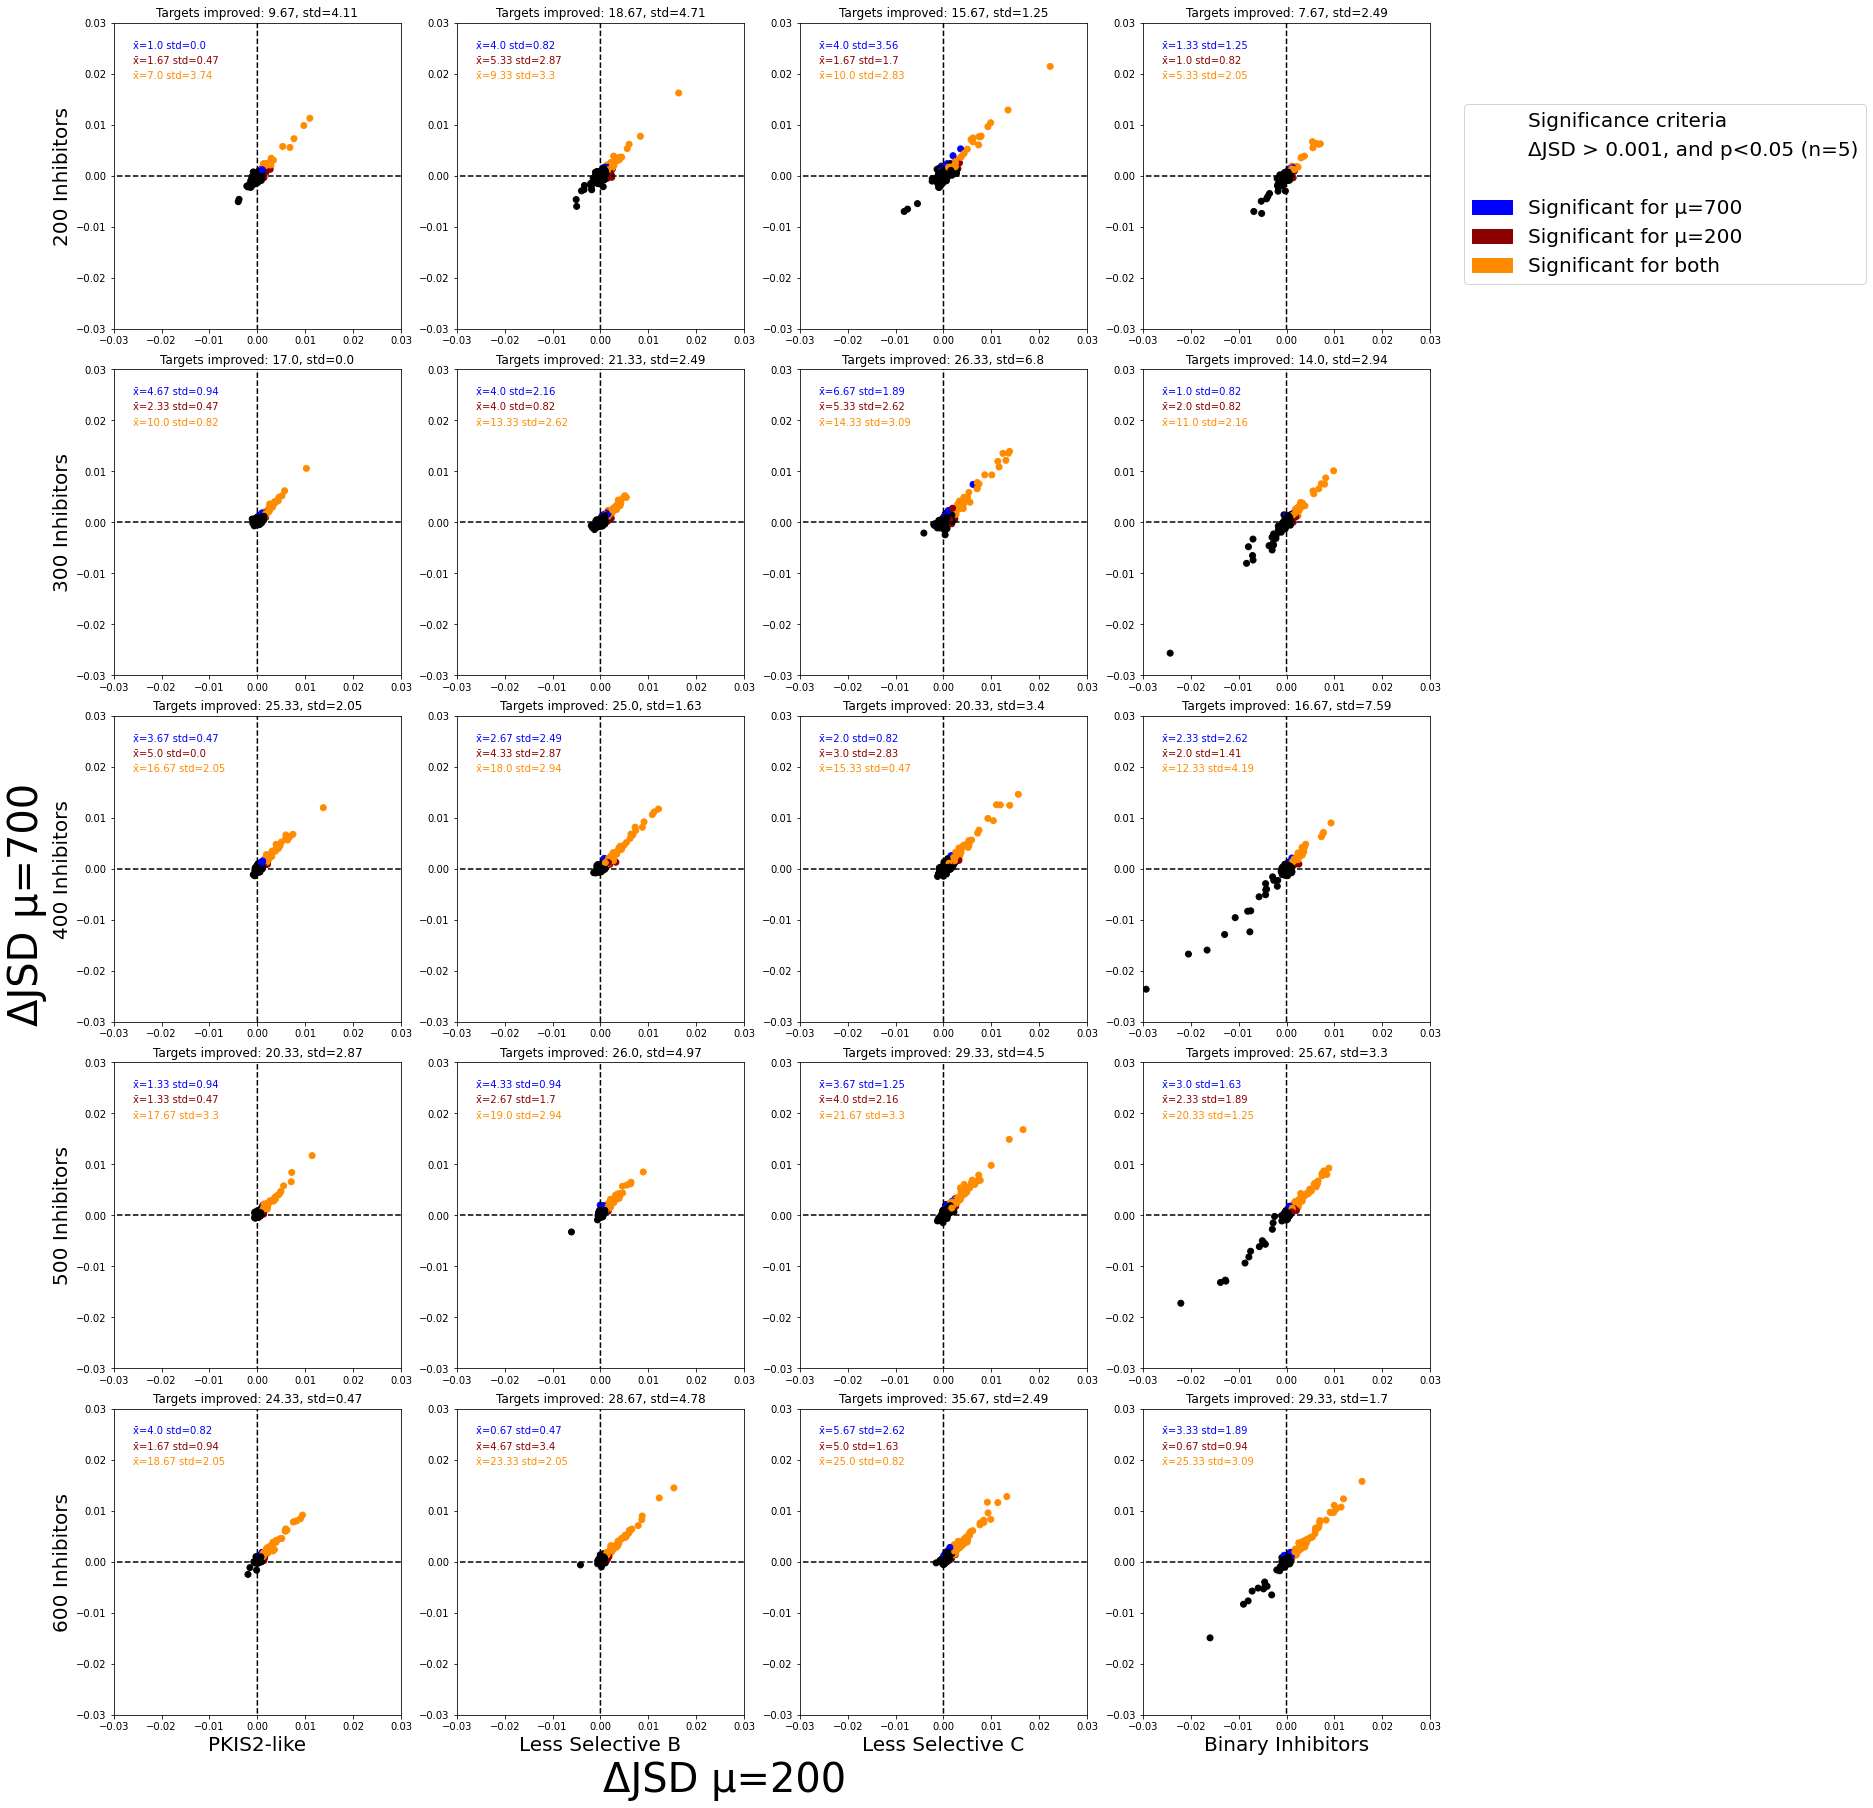

In [121]:
#Determine the total number of plots to make (row, col)
num_row = 5
num_col = 4

fig, axes = plt.subplots(num_row, num_col, figsize=(20,25),constrained_layout=True)

fig.supxlabel('ΔJSD μ=200', fontsize=40)
fig.supylabel('ΔJSD μ=700', fontsize=40)

u700ldg = mpatches.Patch(color='b', label='Significant for μ=700')
u200ldg = mpatches.Patch(color='darkred', label='Significant for μ=200')
bothldg = mpatches.Patch(color='darkorange', label='Significant for both')

s1 = mpatches.Patch(color='none', label='Significance criteria')
s2 = mpatches.Patch(color='none', label='ΔJSD > 0.001, and p<0.05 (n=5)')
spacer = mpatches.Patch(color='none', label='')

fig.legend(handles=[s1,s2,spacer,u700ldg, u200ldg, bothldg],bbox_to_anchor=(1.3, 0.95),fontsize=20)

axes[4][0].set_xlabel('PKIS2-like', fontsize=20)
axes[4][1].set_xlabel('Less Selective B', fontsize=20)
axes[4][2].set_xlabel('Less Selective C', fontsize=20)
axes[4][3].set_xlabel('Binary Inhibitors', fontsize=20)

#make a data structure to hold off-target counts for a later figure

off_target_effects_200 = []
off_target_effects_700 = []

for row in range(0, num_row):
    
    n_inhib = (row*100)+200
    axes[row][0].set_ylabel(str(n_inhib)+' Inhibitors',fontsize=20)
    
    off_target_effects_200.append([])
    off_target_effects_700.append([])
    
    for col in range(0, num_col):
        
        temp = np.arange(-1,1,0.001)
        zeros =temp*0
        axes[row][col].plot(temp,zeros,'k--')
        axes[row][col].plot(zeros,temp,'k--')
        
        nsig_700 = []
        nsig_200 = []
        nsig_both = []
        
        JSD_changes_200 = []
        JSD_changes_700 = []
        
        i1_mu200_values = []
        i1_mu700_values = []
        
        off_target_effects_200[row].append(([],[]))
        off_target_effects_700[row].append(([],[]))

        for test_val in range(0, 3):
            
            test_results_200 = categories[row][col][test_val][0]
            test_results_700 = categories[row][col][test_val][1]
            
            if test_results_200 != [] and test_results_700 != []:
                
                #print(row,col,test_val)
                
                max_inhib_num = len(test_results_200[0])
                #for each kinase, get the set of scores at i=1, i=2, i=3 etc
                organized_results_200 = {}
                organized_results_700 = {}

                for replicate_200 in test_results_200:    #in each of the 5 test replicates
                    for individual_result in replicate_200:    #for each combination
                        inhibitor_combination_number = individual_result[0]     
                        k_names = individual_result[1][1]
                        JS_scores = individual_result[1][2]
                        for i in range(0, len(k_names)):
                            if k_names[i] not in organized_results_200:
                                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

                for replicate_700 in test_results_700:    #in each of the 5 test replicates
                    for individual_result in replicate_700:    #for each combination
                        inhibitor_combination_number = individual_result[0]     
                        k_names = individual_result[1][1]
                        JS_scores = individual_result[1][2]
                        for i in range(0, len(k_names)):
                            if k_names[i] not in organized_results_700:
                                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

                #determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
                #and if that difference is significant or not

                x_200_scored_kinase_names = []
                x_200_values = []
                x_sig = []
                max_200_vals = []
                stdevs_200 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
                JSD_200_i1_scores = [] #the raw scores
                JSD_200_max_scores = [] #the raw scores

                y_700_scored_kinase_names = []
                y_700_values = []
                y_sig = []
                max_700_vals = []
                stdevs_700 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
                JSD_700_i1_scores = [] #the raw scores
                JSD_700_max_scores = [] #the raw scores

                for kinase in organized_results_200:
                    #get the i=1 conition
                    i1_mean = np.mean(organized_results_200[kinase][0])
                    i1_values = organized_results_200[kinase][0]
                    max_other_combination = 0
                    max_other_combination_values = []
                    significant = 0
                    max_i_number = 0
                    #compare to higher combination #s
                    for j in range(1, max_inhib_num):
                        if organized_results_200[kinase][j] != []:
                            i_combo_mean = np.mean(organized_results_200[kinase][j])
                            if i_combo_mean > max_other_combination:
                                max_other_combination = i_combo_mean
                                max_other_combination_values = organized_results_200[kinase][j]
                                max_i_number = j
                    if max_other_combination_values != []:
                        max_200_vals.append(max_other_combination)
                        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
                        stdev = np.std(differences)
                        stdevs_200.append(stdev)
                        #is the difference significant?
                        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
                        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.001)):
                            significant = 1
                        JS_score_difference = max_other_combination - i1_mean
                        x_200_scored_kinase_names.append(kinase)
                        x_200_values.append(JS_score_difference)
                        x_sig.append(significant)
                        JSD_200_i1_scores.append(i1_values)
                        JSD_200_max_scores.append(max_other_combination_values)
                        
                        #if the difference is significant, keep track of the off-target effects to build the next figure
                        if significant == 1:
                            for replicate_200 in test_results_200:
                                for k_temp in replicate_200[0][1][1]:
                                    if kinase == k_temp:
                                        #get the index of the kinase at the i=1 and i>1 max conditions
                                        i1_index = replicate_200[0][1][1].index(kinase)
                                        maxi_index = replicate_200[max_i_number][1][1].index(kinase)
                                        #get the off-target values
                                        offt_i1_values = replicate_200[0][1][3][i1_index]
                                        offt_maxi_values = replicate_200[max_i_number][1][3][maxi_index]
                                        #append these values to our output data structure
                                        off_target_effects_200[row][col][0].append(offt_i1_values)
                                        off_target_effects_200[row][col][1].append(offt_maxi_values)
                            
                for kinase in organized_results_700:
                    #get the i=1 conition
                    i1_mean = np.mean(organized_results_700[kinase][0])
                    i1_values = organized_results_700[kinase][0]
                    max_other_combination = 0
                    max_other_combination_values = []
                    significant = 0
                    #compare to higher combination #s
                    for j in range(1, max_inhib_num):
                        if organized_results_700[kinase][j] != []:
                            i_combo_mean = np.mean(organized_results_700[kinase][j])
                            if i_combo_mean > max_other_combination:
                                max_other_combination = i_combo_mean
                                max_other_combination_values = organized_results_700[kinase][j]
                    if max_other_combination_values != []:
                        max_700_vals.append(max_other_combination)
                        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
                        stdev = np.std(differences)
                        stdevs_700.append(stdev)
                        #is the difference significant?
                        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
                        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.001)):
                            significant = 2
                        JS_score_difference = max_other_combination - i1_mean
                        y_700_scored_kinase_names.append(kinase)
                        y_700_values.append(JS_score_difference)
                        y_sig.append(significant)
                        JSD_700_i1_scores.append(i1_values)
                        JSD_700_max_scores.append(max_other_combination_values)
                        
                        #if the difference is significant, keep track of the off-target effects to build the next figure
                        if significant == 2:
                            for replicate_700 in test_results_700:
                                for k_temp in replicate_700[0][1][1]:
                                    if kinase == k_temp:
                                        #get the index of the kinase at the i=1 and i>1 max conditions
                                        i1_index = replicate_700[0][1][1].index(kinase)
                                        maxi_index = replicate_700[max_i_number][1][1].index(kinase)
                                        #get the off-target values
                                        offt_i1_values = replicate_700[0][1][3][i1_index]
                                        offt_maxi_values = replicate_700[max_i_number][1][3][maxi_index]
                                        #append these values to our output data structure
                                        off_target_effects_700[row][col][0].append(offt_i1_values)
                                        off_target_effects_700[row][col][1].append(offt_maxi_values)
                        
                akn = []
                for nm in x_200_scored_kinase_names:
                    akn.append(nm)
                for nm in y_700_scored_kinase_names:
                    akn.append(nm)
                all_kinase_names = set(akn)
                
                for i1_res_200 in JSD_200_i1_scores:
                    for single_score in i1_res_200:
                        i1_mu200_values.append(single_score)
                for i1_res_700 in JSD_700_i1_scores:
                    for single_score in i1_res_700:
                        i1_mu700_values.append(single_score)
    
                #for each kinase in PKIS2, get the x_val, the y_val, the total significance

                final_kinases = []
                final_x = []
                final_y = []
                sum_sig = []

                final_std_200 = []
                final_std_700 = []

                final_JSD_200_i1 = []
                final_JSD_700_i1 = []
                final_JSD_200_max = []
                final_JSD_700_max = []

                final_JSD_200_i1_stdev = []
                final_JSD_700_i1_stdev = []
                final_JSD_200_max_stdev = []
                final_JSD_700_max_stdev = []

                for kinase_target in all_kinase_names:

                    add = True
                    x_index = None
                    y_index = None

                    if kinase_target in x_200_scored_kinase_names:
                        x_index = x_200_scored_kinase_names.index(kinase_target)
                        #final_x.append(x_200_values[x_index])
                        #if x_sig[x_index] > 0:
                        #    add=True
                        #sum_sig.append(x_sig[index])
                    #else:
                        #final_x.append(0)
                        #sum_sig.append(0)
                    if kinase_target in y_700_scored_kinase_names:
                        y_index = y_700_scored_kinase_names.index(kinase_target)
                        #if y_sig[y_index] > 0:
                        #    add = True
                        #final_y.append(y_700_values[index])
                        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
                    #else:
                        #final_y.append(0)
                    if add:
                        final_x.append(x_200_values[x_index])
                        final_y.append(y_700_values[y_index])
                        sum_sig.append(x_sig[x_index]+y_sig[y_index])
                        final_kinases.append(kinase_target)
                        final_std_700.append(stdevs_700[y_index]) # the std of the differences in score
                        final_std_200.append(stdevs_200[x_index]) #the std off the differences in score

                        final_JSD_200_i1.append(np.mean(JSD_200_i1_scores[x_index]))
                        final_JSD_200_max.append(np.mean(JSD_200_max_scores[x_index]))
                        final_JSD_200_i1_stdev.append(np.std(JSD_200_i1_scores[x_index]))
                        final_JSD_200_max_stdev.append(np.std(JSD_200_max_scores[x_index]))

                        final_JSD_700_i1.append(np.mean(JSD_700_i1_scores[y_index]))
                        final_JSD_700_max.append(np.mean(JSD_700_max_scores[y_index]))
                        final_JSD_700_i1_stdev.append(np.std(JSD_700_i1_scores[y_index]))
                        final_JSD_700_max_stdev.append(np.std(JSD_700_max_scores[y_index]))
        
                #convert significane to a different color for the points
                #black = not significant
                #yellow = significant for 200 (1)
                #blue = significant for 700 (2)
                #cyan = significant for both (3)
                point_color = []
                total = 0
                ns_200 = 0
                ns_700 = 0
                ns_both = 0
                for value in sum_sig:
                    if value == 1:
                        point_color.append('darkred')
                        total+=1
                        ns_200 += 1
                    elif value == 2:
                        point_color.append('b')
                        total+=1
                        ns_700+=1
                    elif value == 3:
                        point_color.append('darkorange')
                        total+=1
                        ns_both += 1
                    else:
                        point_color.append('k')
                 
                nsig_700.append(ns_700)
                nsig_200.append(ns_200)
                nsig_both.append(ns_both)
                
                axes[row][col].scatter(final_x, final_y, c=point_color)
                axes[row][col].set_xlim(-0.03,0.03)
                axes[row][col].set_ylim(-0.03,0.03)
                
                for c in range(0, len(point_color)):
                    if point_color[c] == 'darkorange' or point_color[c] == 'darkred':
                        JSD_changes_200.append(final_x[c])
                    if point_color[c] == 'darkorange' or point_color[c] == 'b':
                        JSD_changes_700.append(final_y[c])
                
        allt_improved = [nsig_200[q]+nsig_700[q]+nsig_both[q] for q in range(0, len(nsig_200))]
        total_improved_mean = np.mean(allt_improved)
        total_improved_std = np.std(allt_improved)
        
        axes[row][col].set_title('Targets improved: '+str(round(total_improved_mean,2)) + 
                                 ', std=' + str(round(total_improved_std,2)), fontsize=12)
        
        improved_200_mean = np.mean(nsig_200)
        improved_700_mean = np.mean(nsig_700)
        improved_both_mean = np.mean(nsig_both)
        
        improved_200_stdev = np.std(nsig_200)
        improved_700_stdev = np.std(nsig_700)
        improved_both_stdev = np.std(nsig_both)
        
        axes[row][col].text(-0.026,0.025,'x̄='+str(round(improved_700_mean,2))+' std='+str(round(improved_700_stdev,2)), color='b')
        axes[row][col].text(-0.026,0.022,'x̄='+str(round(improved_200_mean,2))+' std='+str(round(improved_200_stdev,2)), color='darkred')
        axes[row][col].text(-0.026,0.019,'x̄='+str(round(improved_both_mean,2))+' std='+str(round(improved_both_stdev,2)), color='darkorange')        
        
        average_improvement_200 = np.mean(JSD_changes_200)
        average_improvement_700 = np.mean(JSD_changes_700)
        std_improvement_200 = np.std(JSD_changes_200)
        std_improvement_700 = np.std(JSD_changes_700)
        
        #axes[row][col].text(0.002,-0.005,'Of sig. (+)ΔJSD targets')
        
        #axes[row][col].text(0.002,-0.010,'ΔJSD μ=200')
        #axes[row][col].text(0.002,-0.013,'x̄='+str(round(average_improvement_200,6)))
        #axes[row][col].text(0.002,-0.016,'std='+str(round(std_improvement_200,6)))
        
        #axes[row][col].text(0.002,-0.020,'ΔJSD μ=700')
        #axes[row][col].text(0.002,-0.023,'x̄='+str(round(average_improvement_700,6)))
        #axes[row][col].text(0.002,-0.026,'std='+str(round(std_improvement_700,6)))
        
        #axes[row][col].text(-0.026,0.014,'i=1 scores (n=300)')
        
        avg_200 = np.mean(i1_mu200_values)
        std_200 = np.std(i1_mu200_values)
        n_200 = len(i1_mu200_values)
        avg_700 = np.mean(i1_mu700_values)
        std_700 = np.std(i1_mu700_values)
        n_700 = len(i1_mu700_values)
        #axes[row][col].text(-0.03,0.011,'μ200: '+str(round(avg_200,5)) + ' std='+str(round(std_200,5)))
        #axes[row][col].text(-0.03,0.008,'μ700: '+str(round(avg_700,5)) + ' std='+str(round(std_700,5)))
        
        #print('test type: ', str(col))
        #print('inhib #: ',str((row+2)*100))
        #print('μ200: '+str(round(avg_200,5)) + ' std='+str(round(std_200,5)))
        #print('μ700: '+str(round(avg_700,5)) + ' std='+str(round(std_700,5)))
        
for r in off_target_effects_700:
    for c in r:
        print(len(c[0]),len(c[1]))
            
plt.show()

#fig.savefig("121821_Simulated_Inhibitors_JSD_700v200_scatterplot_fewer_labels.pdf", bbox_inches='tight',dpi=500)

In [ ]:
#what were the average i=1 scores for each condition? (copied from above output)

'''
test type:  0
inhib #:  200
μ200: 0.96435 std=0.02351
μ700: 0.96468 std=0.0234
test type:  1
inhib #:  200
μ200: 0.95506 std=0.02975
μ700: 0.95532 std=0.02969
test type:  2
inhib #:  200
μ200: 0.93445 std=0.04789
μ700: 0.93429 std=0.04783
test type:  3
inhib #:  200
μ200: 0.95934 std=0.02233
μ700: 0.95934 std=0.02225
test type:  0
inhib #:  300
μ200: 0.97241 std=0.01705
μ700: 0.97228 std=0.0171
test type:  1
inhib #:  300
μ200: 0.96469 std=0.0238
μ700: 0.96461 std=0.02385
test type:  2
inhib #:  300
μ200: 0.95696 std=0.03623
μ700: 0.95701 std=0.03612
test type:  3
inhib #:  300
μ200: 0.96468 std=0.0198
μ700: 0.96455 std=0.01982
test type:  0
inhib #:  400
μ200: 0.97618 std=0.01635
μ700: 0.97629 std=0.0163
test type:  1
inhib #:  400
μ200: 0.97266 std=0.02002
μ700: 0.97285 std=0.01993
test type:  2
inhib #:  400
μ200: 0.96556 std=0.02948
μ700: 0.96596 std=0.02931
test type:  3
inhib #:  400
μ200: 0.96956 std=0.01952
μ700: 0.96949 std=0.01952
test type:  0
inhib #:  500
μ200: 0.98052 std=0.01411
μ700: 0.98072 std=0.01407
test type:  1
inhib #:  500
μ200: 0.97924 std=0.01496
μ700: 0.97924 std=0.01501
test type:  2
inhib #:  500
μ200: 0.9687 std=0.02717
μ700: 0.9689 std=0.02704
test type:  3
inhib #:  500
μ200: 0.97304 std=0.0169
μ700: 0.973 std=0.01692
test type:  0
inhib #:  600
μ200: 0.98315 std=0.0132
μ700: 0.98285 std=0.01325
test type:  1
inhib #:  600
μ200: 0.97968 std=0.01634
μ700: 0.97973 std=0.0163
test type:  2
inhib #:  600
μ200: 0.97294 std=0.023
μ700: 0.97266 std=0.02319
test type:  3
inhib #:  600
μ200: 0.97557 std=0.01673
μ700: 0.97573 std=0.01674
'''




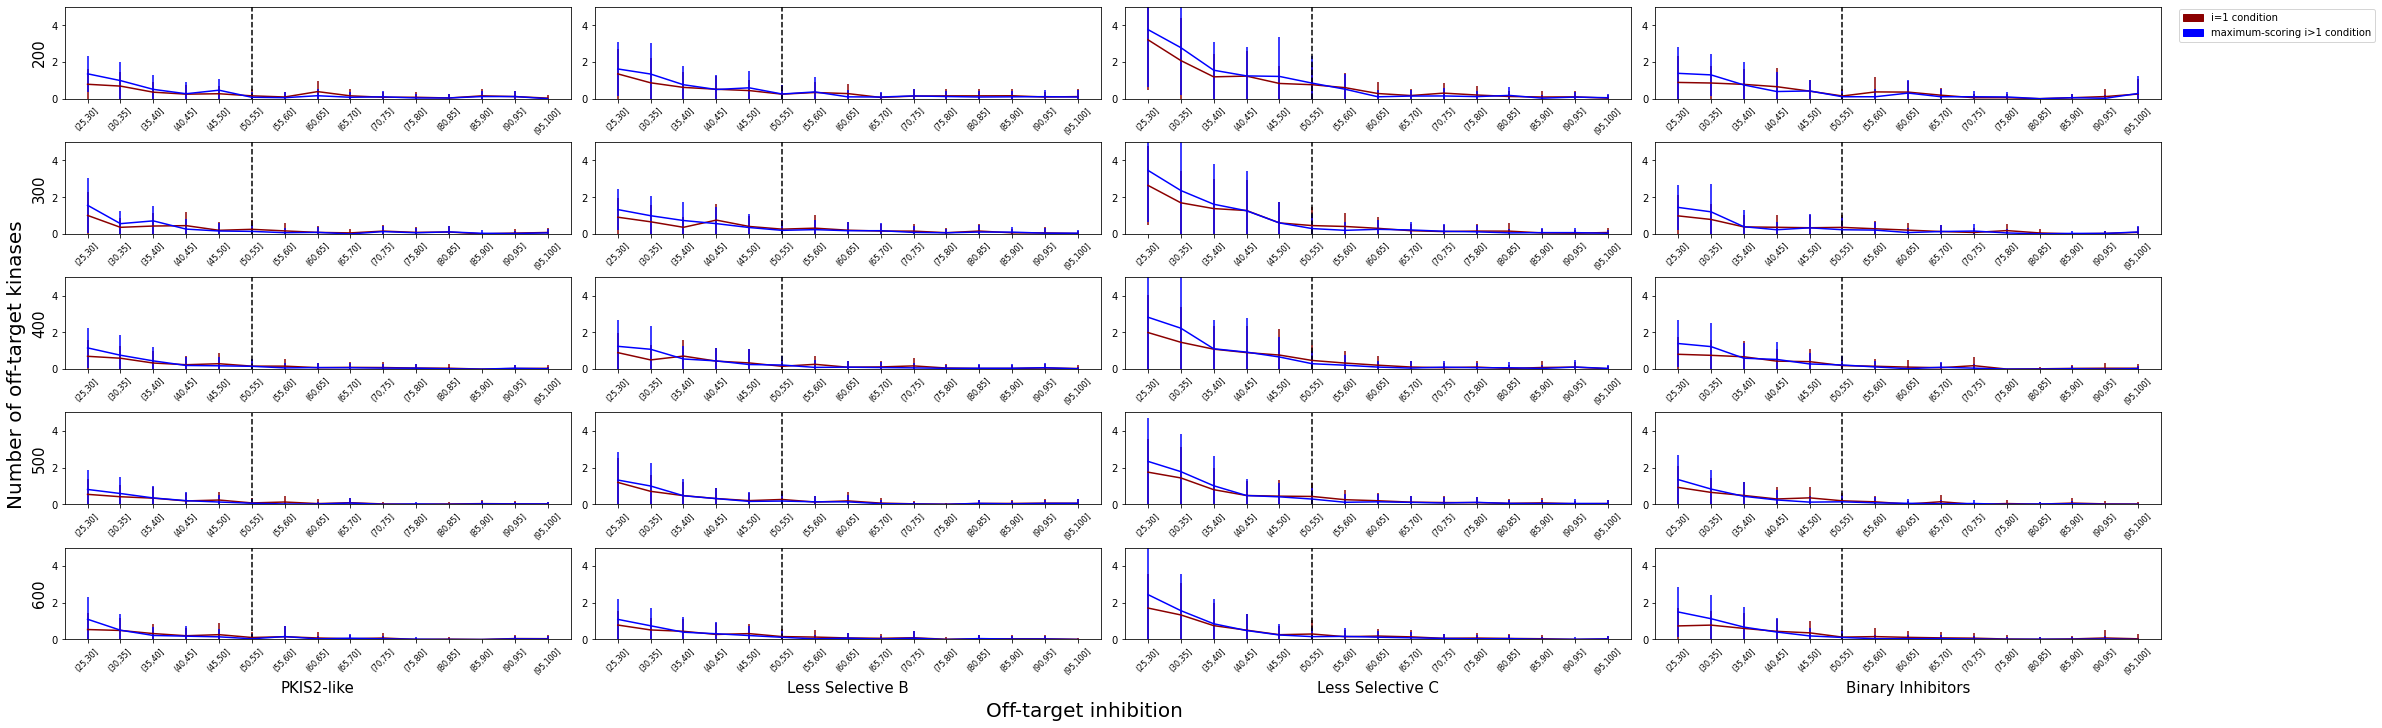

In [74]:
#For each condition, get the off-targets and build plots for the actual changes in off-target effects
#note, the number of data arrays that are used to construct the plots will vaary. Ex: for binary inhibitors
#at the 200i count, there are (on average) 6.33 significant inhibitors per analysis at the u200 condition.
#15 seperate runs were used the construct these data points (3 "biological" replicates with 5 technical replicates
#of each), so in total there are 6.33*15=95 seperate off-target distributions. The data is reported as the mean
#and std of these 15 replicates for each point, or 95 distributions (for the "aaverage" off-target distribution) 
#of a significantly enhanced point for the binary inhibitor/200i condition).


#first, aggregate the data that we already have

off_target_effects_200 = off_target_effects_200 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(30,10),constrained_layout=True)

fig.supxlabel('Off-target inhibition', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.1, 1))

axes[4][0].set_xlabel('PKIS2-like',fontsize=15)
axes[4][1].set_xlabel('Less Selective B',fontsize=15)
axes[4][2].set_xlabel('Less Selective C',fontsize=15)
axes[4][3].set_xlabel('Binary Inhibitors',fontsize=15)

axes[0][0].set_ylabel('200',fontsize=15)
axes[1][0].set_ylabel('300',fontsize=15)
axes[2][0].set_ylabel('400',fontsize=15)
axes[3][0].set_ylabel('500',fontsize=15)
axes[4][0].set_ylabel('600',fontsize=15)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_200_binned = []
    
        for replicate in off_target_effects_200[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_200_binned.append(bins)
            
        max_200_binned = []
    
        for replicate in off_target_effects_200[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_200_binned.append(bins)

        
        avg_i1_200=list(np.average(i1_200_binned, axis=0))
        std_i1_200=list(np.std(i1_200_binned, axis=0))
    
        avg_max_200=list(np.average(max_200_binned, axis=0))
        std_max_200=list(np.std(max_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_200 = bin_max[5:]
        avg_i1_200 = avg_i1_200[5:]
        std_i1_200 = std_i1_200[5:]
        avg_max_200 = avg_max_200[5:]
        std_max_200 = std_max_200[5:]
    
        ylim200_a = max(avg_i1_200)
        ylim200_b = max(avg_max_200)
        ylim_200 = max([ylim200_a,ylim200_b])
    
        axes[row][col].errorbar(bin_max_200, avg_i1_200, yerr=std_i1_200,xerr=None, color='darkred')
        axes[row][col].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[row][col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[row][col].set_ylim([0,5])
        
        thresh1 = np.arange(0,5,0.01)
        xlim = [5]*len(thresh1)
        axes[row][col].plot(xlim,thresh1,'k--')
    
        #add a vertical line to represent where the on-target prior becomes innefectual in either
        #thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
        #xlim = [5]*len(thresh1)
        #axes[i][0].plot(xlim,thresh1,'k--')
        #axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
#fig.savefig("120821_PKIS2_JSD_700v200_19_kinase-specific-plots-1-2.pdf", bbox_inches='tight',dpi=500)

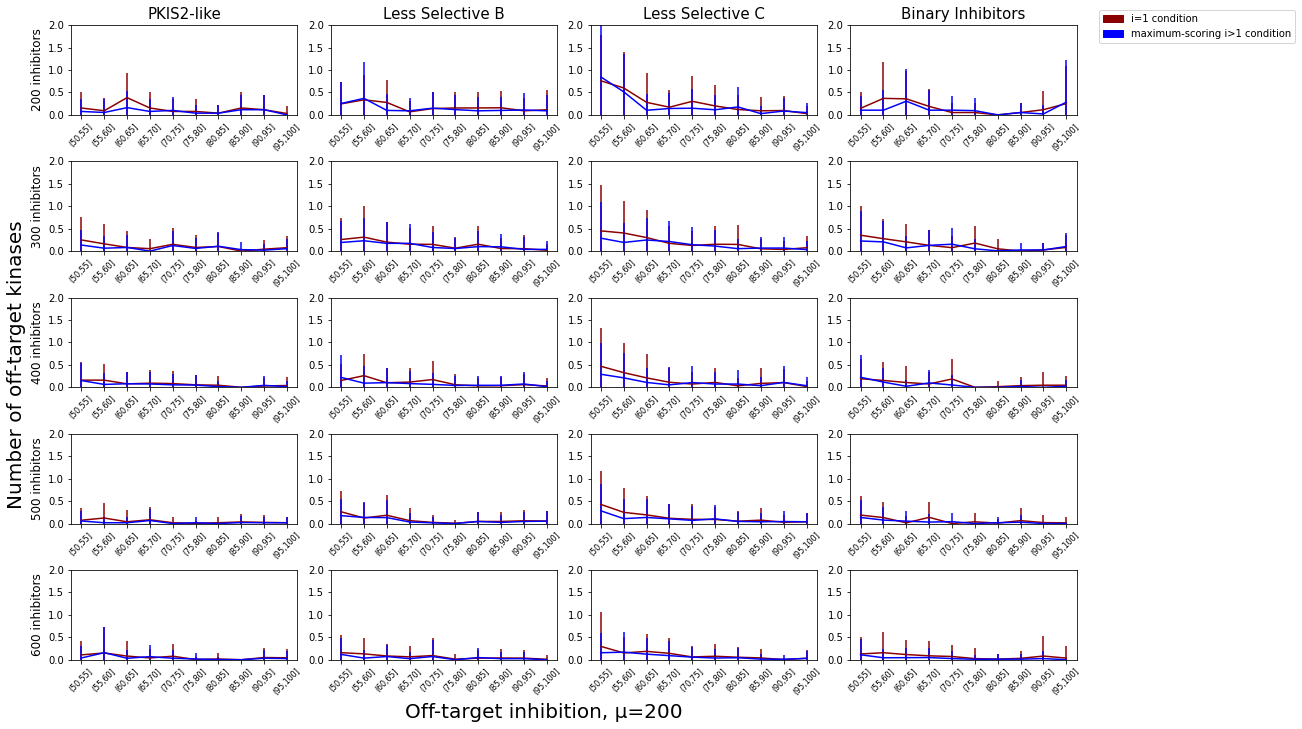

In [119]:
#For each condition, get the off-targets and build plots for the actual changes in off-target effects
#note, the number of data arrays that are used to construct the plots will vaary. Ex: for binary inhibitors
#at the 200i count, there are (on average) 6.33 significant inhibitors per analysis at the u200 condition.
#15 seperate runs were used the construct these data points (3 "biological" replicates with 5 technical replicates
#of each), so in total there are 6.33*15=95 seperate off-target distributions. The data is reported as the mean
#and std of these 15 replicates for each point, or 95 distributions (for the "aaverage" off-target distribution) 
#of a significantly enhanced point for the binary inhibitor/200i condition).


#first, aggregate the data that we already have

off_target_effects_200 = off_target_effects_200 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(15,10),constrained_layout=True)

fig.supxlabel('Off-target inhibition, μ=200', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.2, 1))

axes[0][0].set_title('PKIS2-like',fontsize=15)
axes[0][1].set_title('Less Selective B',fontsize=15)
axes[0][2].set_title('Less Selective C',fontsize=15)
axes[0][3].set_title('Binary Inhibitors',fontsize=15)

axes[0][0].set_ylabel('200 inhibitors',fontsize=12)
axes[1][0].set_ylabel('300 inhibitors',fontsize=12)
axes[2][0].set_ylabel('400 inhibitors',fontsize=12)
axes[3][0].set_ylabel('500 inhibitors',fontsize=12)
axes[4][0].set_ylabel('600 inhibitors',fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_200_binned = []
    
        for replicate in off_target_effects_200[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_200_binned.append(bins)
            
        max_200_binned = []
    
        for replicate in off_target_effects_200[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_200_binned.append(bins)

        
        avg_i1_200=list(np.average(i1_200_binned, axis=0))
        std_i1_200=list(np.std(i1_200_binned, axis=0))
    
        avg_max_200=list(np.average(max_200_binned, axis=0))
        std_max_200=list(np.std(max_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_200 = bin_max[10:]
        avg_i1_200 = avg_i1_200[10:]
        std_i1_200 = std_i1_200[10:]
        avg_max_200 = avg_max_200[10:]
        std_max_200 = std_max_200[10:]
    
        ylim200_a = max(avg_i1_200)
        ylim200_b = max(avg_max_200)
        ylim_200 = max([ylim200_a,ylim200_b])
    
        axes[row][col].errorbar(bin_max_200, avg_i1_200, yerr=std_i1_200,xerr=None, color='darkred')
        axes[row][col].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[row][col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[row][col].set_ylim([0,2])
    
        #add a vertical line to represent where the on-target prior becomes innefectual in either
        #thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
        #xlim = [5]*len(thresh1)
        #axes[i][0].plot(xlim,thresh1,'k--')
        #axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("121921_PKIS2_JSD_off-target-effects-u=200.pdf", bbox_inches='tight',dpi=500)

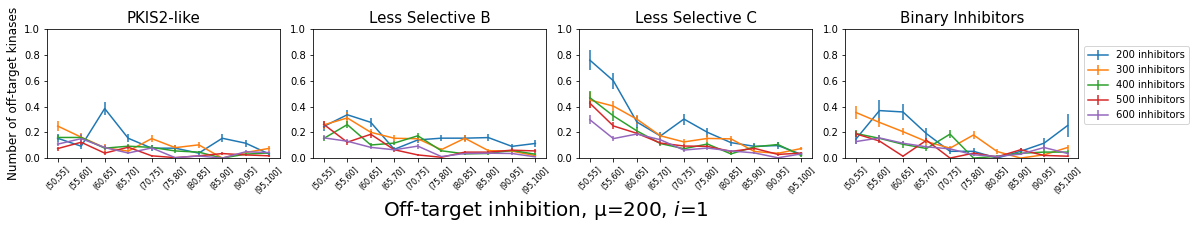

In [109]:
from scipy.stats import sem

#plot just the i=1 scores with SEM (not std) of the scores

off_target_effects_200 = off_target_effects_200 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(1, ncols, figsize=(15,3),constrained_layout=True)

axes[0].set_title('PKIS2-like',fontsize=15)
axes[1].set_title('Less Selective B',fontsize=15)
axes[2].set_title('Less Selective C',fontsize=15)
axes[3].set_title('Binary Inhibitors',fontsize=15)

fig.supxlabel('Off-target inhibition, μ=200, $\it{i}$=1', fontsize=20)
axes[0].set_ylabel('Number of off-target kinases', fontsize=12)

#axes[0][0].set_ylabel('200',fontsize=15)
#axes[1][0].set_ylabel('300',fontsize=15)
#axes[2][0].set_ylabel('400',fontsize=15)
#axes[3][0].set_ylabel('500',fontsize=15)
#axes[4][0].set_ylabel('600',fontsize=15)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_200_binned = []
    
        for replicate in off_target_effects_200[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_200_binned.append(bins)
          
        '''
        max_200_binned = []
    
        for replicate in off_target_effects_200[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_200_binned.append(bins)
        '''

        
        avg_i1_200=list(np.average(i1_200_binned, axis=0))
        sem_i1_200=list(sem(i1_200_binned, axis=0))
    
        #avg_max_200=list(np.average(max_200_binned, axis=0))
        #std_max_200=list(np.std(max_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_200 = bin_max[10:]
        avg_i1_200 = avg_i1_200[10:]
        sem_i1_200 = sem_i1_200[10:]
        #avg_max_200 = avg_max_200[10:]
        #std_max_200 = std_max_200[10:]
    
        ylim200_a = max(avg_i1_200)
        ylim200_b = max(avg_max_200)
        ylim_200 = max([ylim200_a,ylim200_b])
    
        axes[col].errorbar(bin_max_200, avg_i1_200, yerr=sem_i1_200,xerr=None)
        #axes[0][col].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[col].set_ylim([0,1])
        
fig.legend(labels=['200 inhibitors','300 inhibitors',
                   '400 inhibitors','500 inhibitors',
                   '600 inhibitors'],bbox_to_anchor=(1.1, 0.85))
        
        #thresh1 = np.arange(0,5,0.01)
        #xlim = [5]*len(thresh1)
        #axes[row][col].plot(xlim,thresh1,'k--')
    
        #add a vertical line to represent where the on-target prior becomes innefectual in either
        #thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
        #xlim = [5]*len(thresh1)
        #axes[i][0].plot(xlim,thresh1,'k--')
        #axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("121921_PKIS2_JSD_700v200_best_i1_offtarget_profiles_u=200.pdf", bbox_inches='tight',dpi=500)

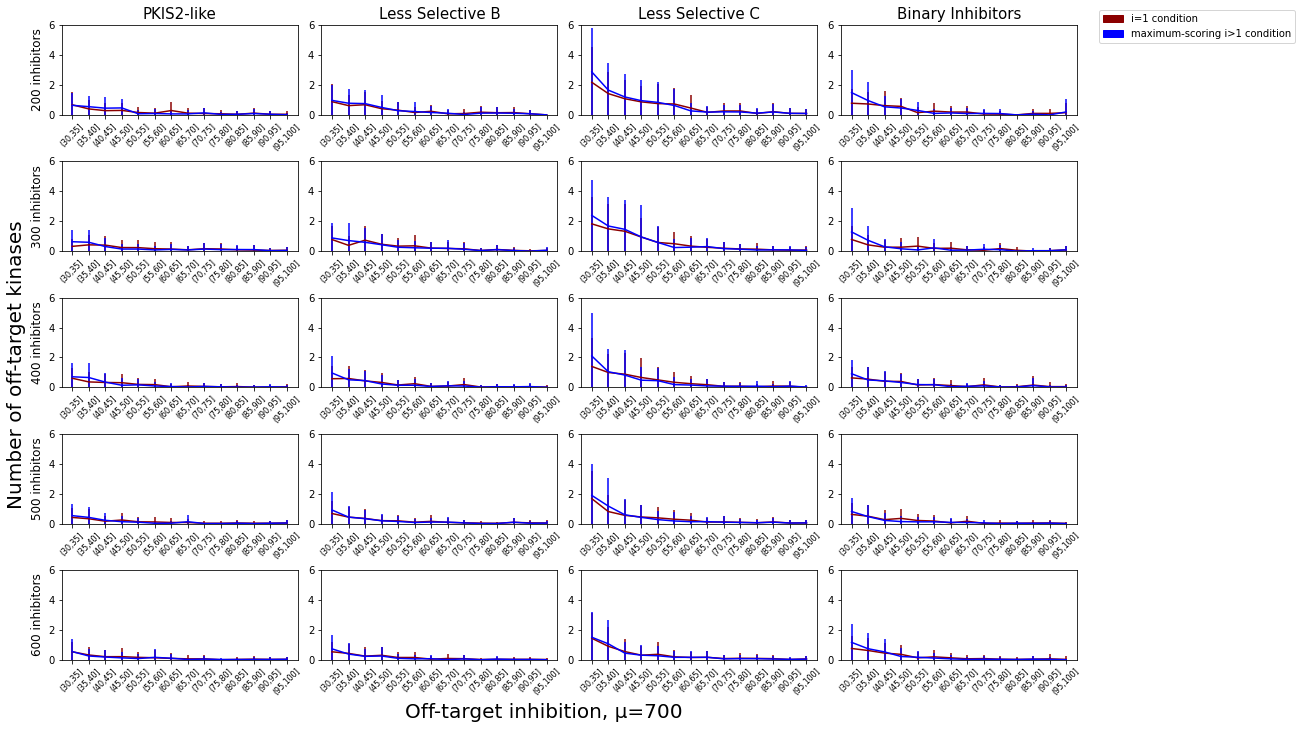

In [136]:
#For each condition, get the off-targets and build plots for the actual changes in off-target effects
#note, the number of data arrays that are used to construct the plots will vaary. Ex: for binary inhibitors
#at the 200i count, there are (on average) 6.33 significant inhibitors per analysis at the u200 condition.
#15 seperate runs were used the construct these data points (3 "biological" replicates with 5 technical replicates
#of each), so in total there are 6.33*15=95 seperate off-target distributions. The data is reported as the mean
#and std of these 15 replicates for each point, or 95 distributions (for the "aaverage" off-target distribution) 
#of a significantly enhanced point for the binary inhibitor/200i condition).


#first, aggregate the data that we already have

off_target_effects_700 = off_target_effects_700 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(15,10),constrained_layout=True)

fig.supxlabel('Off-target inhibition, μ=700', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.2, 1))

axes[0][0].set_title('PKIS2-like',fontsize=15)
axes[0][1].set_title('Less Selective B',fontsize=15)
axes[0][2].set_title('Less Selective C',fontsize=15)
axes[0][3].set_title('Binary Inhibitors',fontsize=15)

axes[0][0].set_ylabel('200 inhibitors',fontsize=12)
axes[1][0].set_ylabel('300 inhibitors',fontsize=12)
axes[2][0].set_ylabel('400 inhibitors',fontsize=12)
axes[3][0].set_ylabel('500 inhibitors',fontsize=12)
axes[4][0].set_ylabel('600 inhibitors',fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_700_binned = []
    
        for replicate in off_target_effects_700[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_700_binned.append(bins)
            
        max_700_binned = []
    
        for replicate in off_target_effects_700[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_700_binned.append(bins)

        
        avg_i1_700=list(np.average(i1_700_binned, axis=0))
        std_i1_700=list(np.std(i1_700_binned, axis=0))
    
        avg_max_700=list(np.average(max_700_binned, axis=0))
        std_max_700=list(np.std(max_700_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
        
        #print(avg_i1_700,std_i1_700)
    
        #only plot from 20 upwards
        bin_max_700 = bin_max[6:]
        avg_i1_700 = avg_i1_700[6:]
        std_i1_700 = std_i1_700[6:]
        avg_max_700 = avg_max_700[6:]
        std_max_700 = std_max_700[6:]
    
        ylim700_a = max(avg_i1_700)
        ylim700_b = max(avg_max_700)
        ylim_700 = max([ylim700_a,ylim700_b])
    
        axes[row][col].errorbar(bin_max_700, avg_i1_700, yerr=std_i1_700,xerr=None, color='darkred')
        axes[row][col].errorbar(bin_max_700, avg_max_700, yerr=std_max_700,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[row][col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[row][col].set_ylim([0,6])
    
        #add a vertical line to represent where the on-target prior becomes innefectual in either
        #thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
        #xlim = [5]*len(thresh1)
        #axes[i][0].plot(xlim,thresh1,'k--')
        #axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("121921_PKIS2_JSD_off-target-effects-u=700.pdf", bbox_inches='tight',dpi=500)

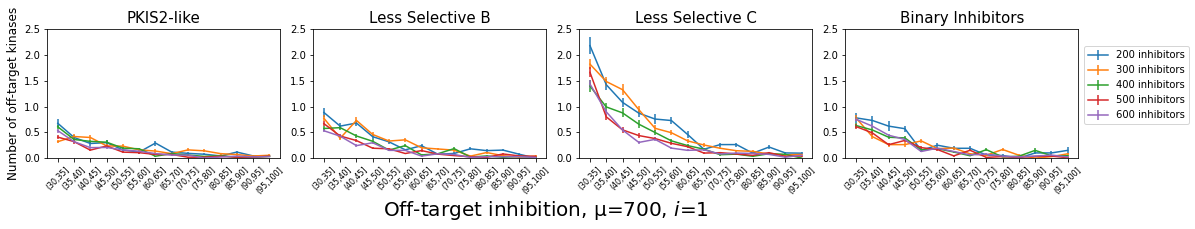

In [135]:
from scipy.stats import sem

#plot just the i=1 scores with SEM (not std) of the scores

off_target_effects_700 = off_target_effects_700 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(1, ncols, figsize=(15,3),constrained_layout=True)

axes[0].set_title('PKIS2-like',fontsize=15)
axes[1].set_title('Less Selective B',fontsize=15)
axes[2].set_title('Less Selective C',fontsize=15)
axes[3].set_title('Binary Inhibitors',fontsize=15)

fig.supxlabel('Off-target inhibition, μ=700, $\it{i}$=1', fontsize=20)
axes[0].set_ylabel('Number of off-target kinases', fontsize=12)

#axes[0][0].set_ylabel('200',fontsize=15)
#axes[1][0].set_ylabel('300',fontsize=15)
#axes[2][0].set_ylabel('400',fontsize=15)
#axes[3][0].set_ylabel('500',fontsize=15)
#axes[4][0].set_ylabel('600',fontsize=15)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_700_binned = []
    
        for replicate in off_target_effects_700[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_700_binned.append(bins)
          
        '''
        max_200_binned = []
    
        for replicate in off_target_effects_200[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_200_binned.append(bins)
        '''

        
        avg_i1_700=list(np.average(i1_700_binned, axis=0))
        sem_i1_700=list(sem(i1_700_binned, axis=0))
    
        #avg_max_200=list(np.average(max_200_binned, axis=0))
        #std_max_200=list(np.std(max_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_700 = bin_max[6:]
        avg_i1_700 = avg_i1_700[6:]
        sem_i1_700 = sem_i1_700[6:]
        #avg_max_200 = avg_max_200[10:]
        #std_max_200 = std_max_200[10:]
    
        ylim700_a = max(avg_i1_700)
        ylim700_b = max(avg_max_700)
        ylim_700 = max([ylim700_a,ylim700_b])
    
        axes[col].errorbar(bin_max_700, avg_i1_700, yerr=sem_i1_700,xerr=None)
        #axes[0][col].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[col].set_ylim([0,2.5])
        
fig.legend(labels=['200 inhibitors','300 inhibitors',
                   '400 inhibitors','500 inhibitors',
                   '600 inhibitors'],bbox_to_anchor=(1.1, 0.85))
        
        #thresh1 = np.arange(0,5,0.01)
        #xlim = [5]*len(thresh1)
        #axes[row][col].plot(xlim,thresh1,'k--')
    
        #add a vertical line to represent where the on-target prior becomes innefectual in either
        #thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
        #xlim = [5]*len(thresh1)
        #axes[i][0].plot(xlim,thresh1,'k--')
        #axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("121921_PKIS2_JSD_700v200_best_i1_offtarget_profiles_u=700.pdf", bbox_inches='tight',dpi=500)

In [ ]:
########################################################################

# REPEAT THE SAME AS ABOVE BUT USE A LARGER THRESHOLD OF 0.005, NOT 0.001

########################################################################

25 25
20 20
65 65
30 30
15 15
5 5
70 70
35 35
40 40
55 55
55 55
20 20
20 20
30 30
85 85
60 60
45 45
55 55
70 70
85 85


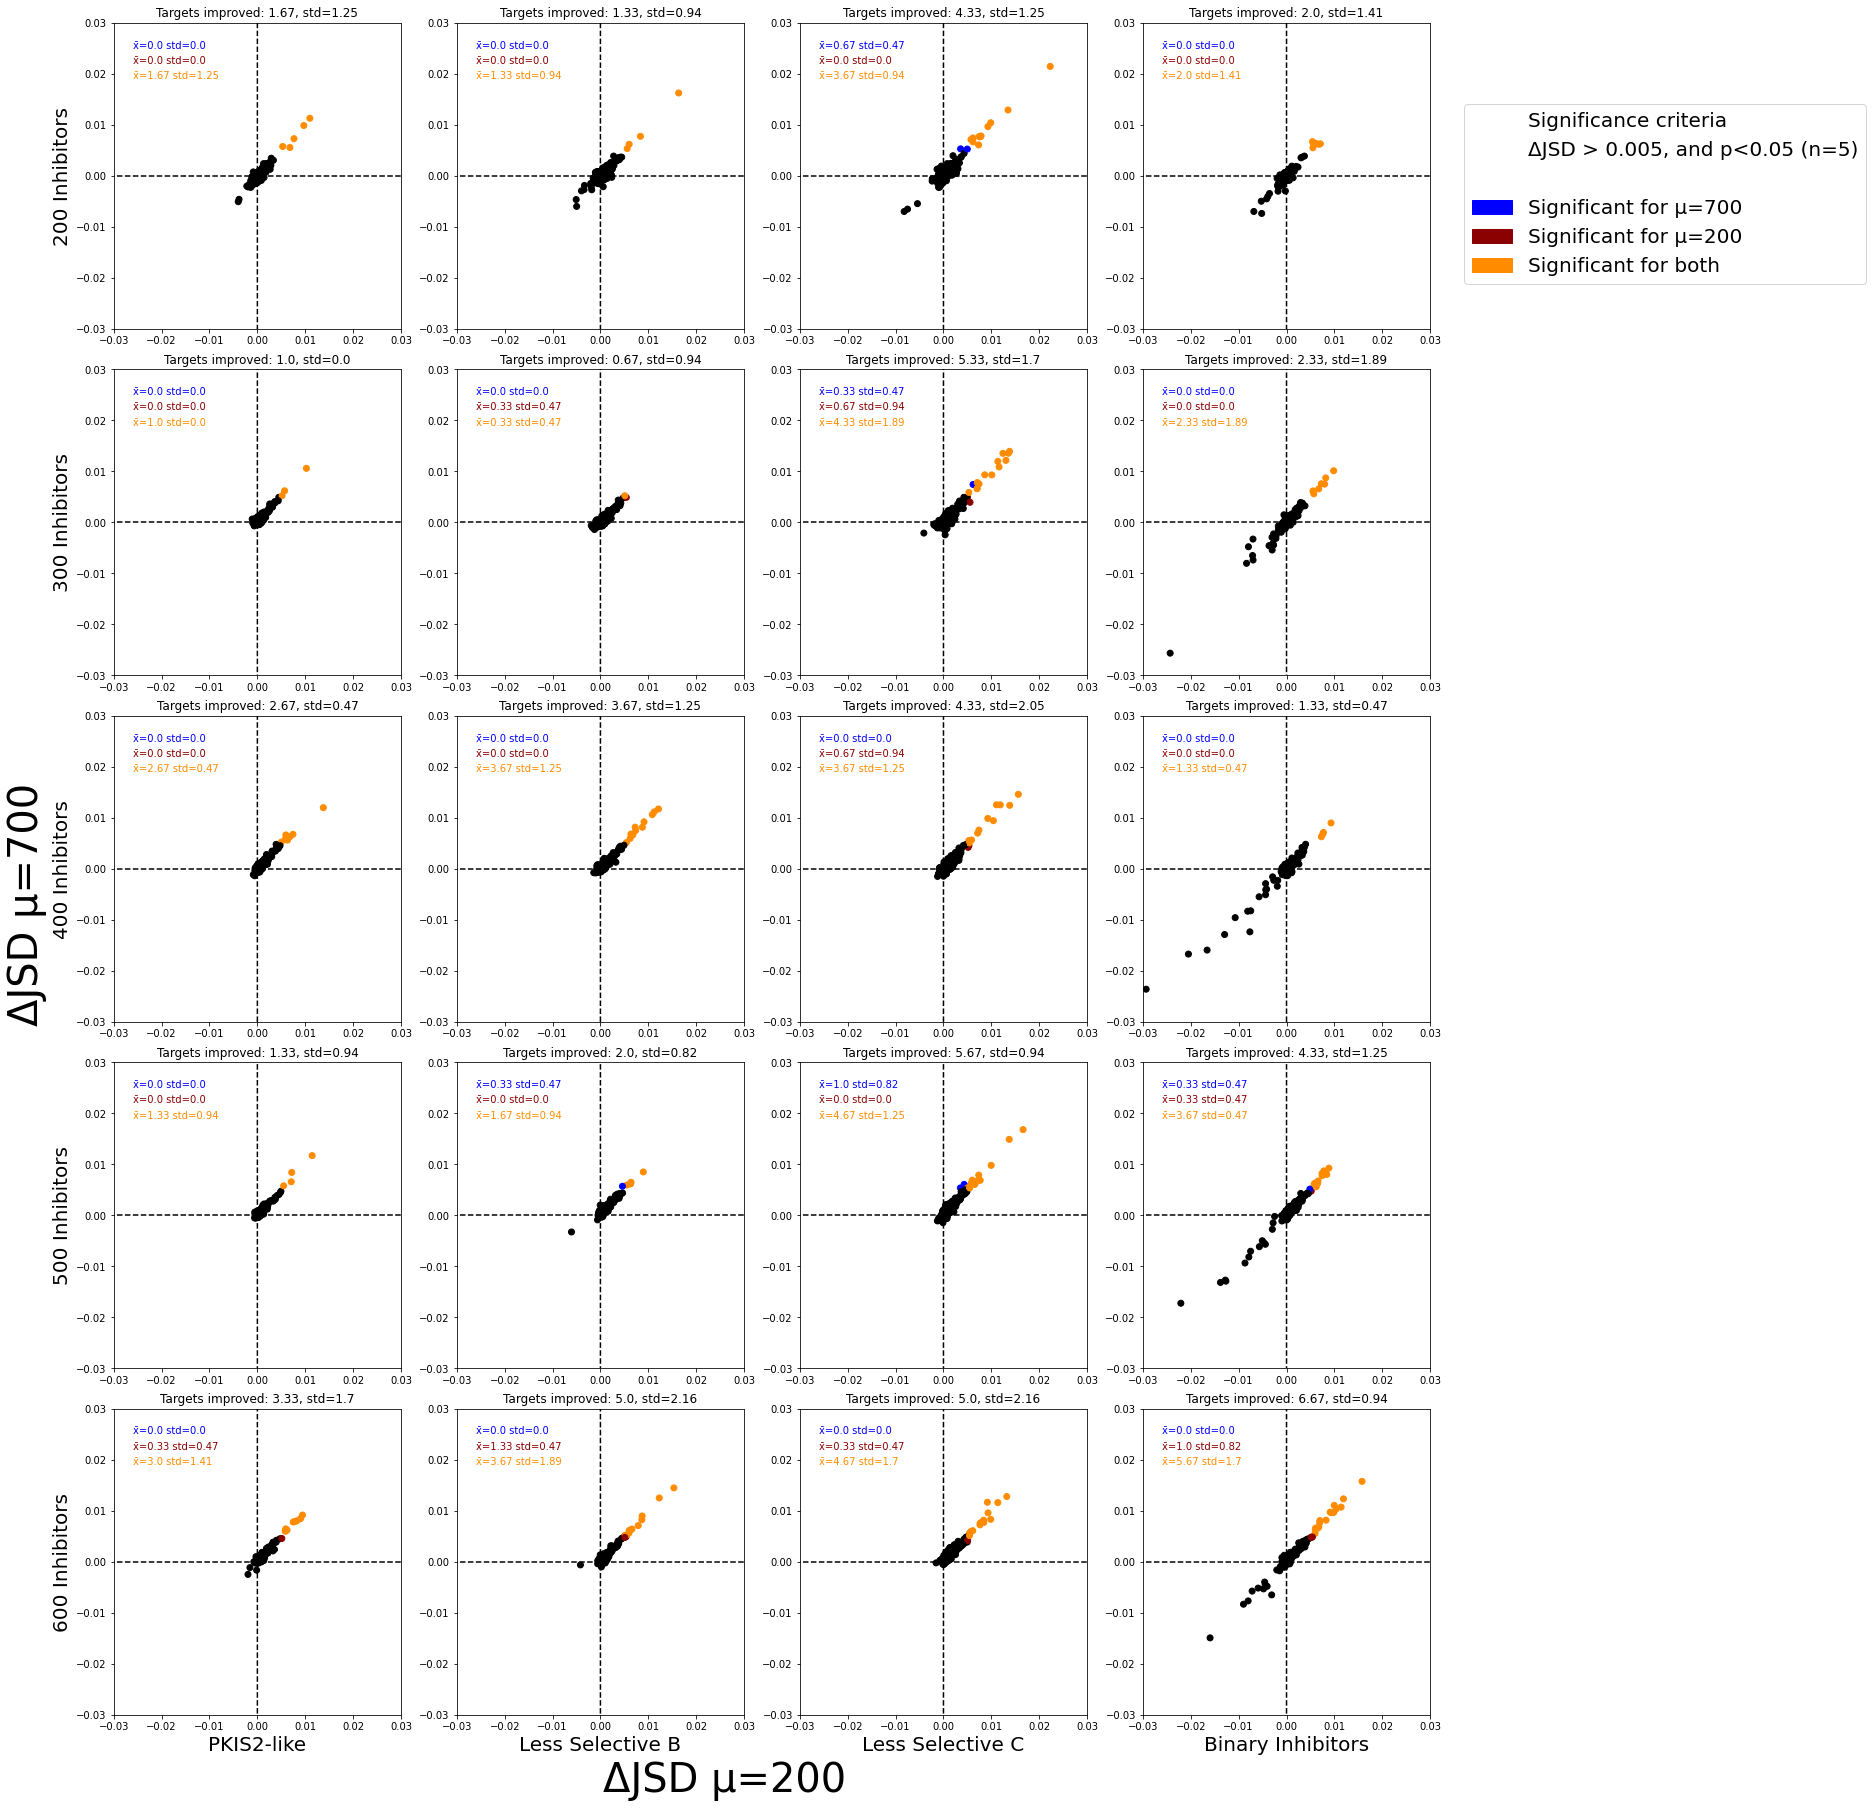

In [154]:
#Determine the total number of plots to make (row, col)
num_row = 5
num_col = 4

fig, axes = plt.subplots(num_row, num_col, figsize=(20,25),constrained_layout=True)

fig.supxlabel('ΔJSD μ=200', fontsize=40)
fig.supylabel('ΔJSD μ=700', fontsize=40)

u700ldg = mpatches.Patch(color='b', label='Significant for μ=700')
u200ldg = mpatches.Patch(color='darkred', label='Significant for μ=200')
bothldg = mpatches.Patch(color='darkorange', label='Significant for both')

s1 = mpatches.Patch(color='none', label='Significance criteria')
s2 = mpatches.Patch(color='none', label='ΔJSD > 0.005, and p<0.05 (n=5)')
spacer = mpatches.Patch(color='none', label='')

fig.legend(handles=[s1,s2,spacer,u700ldg, u200ldg, bothldg],bbox_to_anchor=(1.3, 0.95),fontsize=20)

axes[4][0].set_xlabel('PKIS2-like', fontsize=20)
axes[4][1].set_xlabel('Less Selective B', fontsize=20)
axes[4][2].set_xlabel('Less Selective C', fontsize=20)
axes[4][3].set_xlabel('Binary Inhibitors', fontsize=20)

#make a data structure to hold off-target counts for a later figure

off_target_effects_200 = []
off_target_effects_700 = []

for row in range(0, num_row):
    
    n_inhib = (row*100)+200
    axes[row][0].set_ylabel(str(n_inhib)+' Inhibitors',fontsize=20)
    
    off_target_effects_200.append([])
    off_target_effects_700.append([])
    
    for col in range(0, num_col):
        
        temp = np.arange(-1,1,0.001)
        zeros =temp*0
        axes[row][col].plot(temp,zeros,'k--')
        axes[row][col].plot(zeros,temp,'k--')
        
        nsig_700 = []
        nsig_200 = []
        nsig_both = []
        
        JSD_changes_200 = []
        JSD_changes_700 = []
        
        i1_mu200_values = []
        i1_mu700_values = []
        
        off_target_effects_200[row].append(([],[]))
        off_target_effects_700[row].append(([],[]))

        for test_val in range(0, 3):
            
            test_results_200 = categories[row][col][test_val][0]
            test_results_700 = categories[row][col][test_val][1]
            
            if test_results_200 != [] and test_results_700 != []:
                
                #print(row,col,test_val)
                
                max_inhib_num = len(test_results_200[0])
                #for each kinase, get the set of scores at i=1, i=2, i=3 etc
                organized_results_200 = {}
                organized_results_700 = {}

                for replicate_200 in test_results_200:    #in each of the 5 test replicates
                    for individual_result in replicate_200:    #for each combination
                        inhibitor_combination_number = individual_result[0]     
                        k_names = individual_result[1][1]
                        JS_scores = individual_result[1][2]
                        for i in range(0, len(k_names)):
                            if k_names[i] not in organized_results_200:
                                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

                for replicate_700 in test_results_700:    #in each of the 5 test replicates
                    for individual_result in replicate_700:    #for each combination
                        inhibitor_combination_number = individual_result[0]     
                        k_names = individual_result[1][1]
                        JS_scores = individual_result[1][2]
                        for i in range(0, len(k_names)):
                            if k_names[i] not in organized_results_700:
                                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

                #determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
                #and if that difference is significant or not

                x_200_scored_kinase_names = []
                x_200_values = []
                x_sig = []
                max_200_vals = []
                stdevs_200 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
                JSD_200_i1_scores = [] #the raw scores
                JSD_200_max_scores = [] #the raw scores

                y_700_scored_kinase_names = []
                y_700_values = []
                y_sig = []
                max_700_vals = []
                stdevs_700 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
                JSD_700_i1_scores = [] #the raw scores
                JSD_700_max_scores = [] #the raw scores

                for kinase in organized_results_200:
                    #get the i=1 conition
                    i1_mean = np.mean(organized_results_200[kinase][0])
                    i1_values = organized_results_200[kinase][0]
                    max_other_combination = 0
                    max_other_combination_values = []
                    significant = 0
                    max_i_number = 0
                    #compare to higher combination #s
                    for j in range(1, max_inhib_num):
                        if organized_results_200[kinase][j] != []:
                            i_combo_mean = np.mean(organized_results_200[kinase][j])
                            if i_combo_mean > max_other_combination:
                                max_other_combination = i_combo_mean
                                max_other_combination_values = organized_results_200[kinase][j]
                                max_i_number = j
                    if max_other_combination_values != []:
                        max_200_vals.append(max_other_combination)
                        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
                        stdev = np.std(differences)
                        stdevs_200.append(stdev)
                        #is the difference significant?
                        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
                        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.005)):
                            significant = 1
                        JS_score_difference = max_other_combination - i1_mean
                        x_200_scored_kinase_names.append(kinase)
                        x_200_values.append(JS_score_difference)
                        x_sig.append(significant)
                        JSD_200_i1_scores.append(i1_values)
                        JSD_200_max_scores.append(max_other_combination_values)
                        
                        #if the difference is significant, keep track of the off-target effects to build the next figure
                        if significant == 1:
                            for replicate_200 in test_results_200:
                                for k_temp in replicate_200[0][1][1]:
                                    if kinase == k_temp:
                                        #get the index of the kinase at the i=1 and i>1 max conditions
                                        i1_index = replicate_200[0][1][1].index(kinase)
                                        maxi_index = replicate_200[max_i_number][1][1].index(kinase)
                                        #get the off-target values
                                        offt_i1_values = replicate_200[0][1][3][i1_index]
                                        offt_maxi_values = replicate_200[max_i_number][1][3][maxi_index]
                                        #append these values to our output data structure
                                        off_target_effects_200[row][col][0].append(offt_i1_values)
                                        off_target_effects_200[row][col][1].append(offt_maxi_values)
                            
                for kinase in organized_results_700:
                    #get the i=1 conition
                    i1_mean = np.mean(organized_results_700[kinase][0])
                    i1_values = organized_results_700[kinase][0]
                    max_other_combination = 0
                    max_other_combination_values = []
                    significant = 0
                    #compare to higher combination #s
                    for j in range(1, max_inhib_num):
                        if organized_results_700[kinase][j] != []:
                            i_combo_mean = np.mean(organized_results_700[kinase][j])
                            if i_combo_mean > max_other_combination:
                                max_other_combination = i_combo_mean
                                max_other_combination_values = organized_results_700[kinase][j]
                    if max_other_combination_values != []:
                        max_700_vals.append(max_other_combination)
                        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
                        stdev = np.std(differences)
                        stdevs_700.append(stdev)
                        #is the difference significant?
                        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
                        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.005)):
                            significant = 2
                        JS_score_difference = max_other_combination - i1_mean
                        y_700_scored_kinase_names.append(kinase)
                        y_700_values.append(JS_score_difference)
                        y_sig.append(significant)
                        JSD_700_i1_scores.append(i1_values)
                        JSD_700_max_scores.append(max_other_combination_values)
                        
                        #if the difference is significant, keep track of the off-target effects to build the next figure
                        if significant == 2:
                            for replicate_700 in test_results_700:
                                for k_temp in replicate_700[0][1][1]:
                                    if kinase == k_temp:
                                        #get the index of the kinase at the i=1 and i>1 max conditions
                                        i1_index = replicate_700[0][1][1].index(kinase)
                                        maxi_index = replicate_700[max_i_number][1][1].index(kinase)
                                        #get the off-target values
                                        offt_i1_values = replicate_700[0][1][3][i1_index]
                                        offt_maxi_values = replicate_700[max_i_number][1][3][maxi_index]
                                        #append these values to our output data structure
                                        off_target_effects_700[row][col][0].append(offt_i1_values)
                                        off_target_effects_700[row][col][1].append(offt_maxi_values)
                        
                akn = []
                for nm in x_200_scored_kinase_names:
                    akn.append(nm)
                for nm in y_700_scored_kinase_names:
                    akn.append(nm)
                all_kinase_names = set(akn)
                
                for i1_res_200 in JSD_200_i1_scores:
                    for single_score in i1_res_200:
                        i1_mu200_values.append(single_score)
                for i1_res_700 in JSD_700_i1_scores:
                    for single_score in i1_res_700:
                        i1_mu700_values.append(single_score)
    
                #for each kinase in PKIS2, get the x_val, the y_val, the total significance

                final_kinases = []
                final_x = []
                final_y = []
                sum_sig = []

                final_std_200 = []
                final_std_700 = []

                final_JSD_200_i1 = []
                final_JSD_700_i1 = []
                final_JSD_200_max = []
                final_JSD_700_max = []

                final_JSD_200_i1_stdev = []
                final_JSD_700_i1_stdev = []
                final_JSD_200_max_stdev = []
                final_JSD_700_max_stdev = []

                for kinase_target in all_kinase_names:

                    add = True
                    x_index = None
                    y_index = None

                    if kinase_target in x_200_scored_kinase_names:
                        x_index = x_200_scored_kinase_names.index(kinase_target)
                        #final_x.append(x_200_values[x_index])
                        #if x_sig[x_index] > 0:
                        #    add=True
                        #sum_sig.append(x_sig[index])
                    #else:
                        #final_x.append(0)
                        #sum_sig.append(0)
                    if kinase_target in y_700_scored_kinase_names:
                        y_index = y_700_scored_kinase_names.index(kinase_target)
                        #if y_sig[y_index] > 0:
                        #    add = True
                        #final_y.append(y_700_values[index])
                        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
                    #else:
                        #final_y.append(0)
                    if add:
                        final_x.append(x_200_values[x_index])
                        final_y.append(y_700_values[y_index])
                        sum_sig.append(x_sig[x_index]+y_sig[y_index])
                        final_kinases.append(kinase_target)
                        final_std_700.append(stdevs_700[y_index]) # the std of the differences in score
                        final_std_200.append(stdevs_200[x_index]) #the std off the differences in score

                        final_JSD_200_i1.append(np.mean(JSD_200_i1_scores[x_index]))
                        final_JSD_200_max.append(np.mean(JSD_200_max_scores[x_index]))
                        final_JSD_200_i1_stdev.append(np.std(JSD_200_i1_scores[x_index]))
                        final_JSD_200_max_stdev.append(np.std(JSD_200_max_scores[x_index]))

                        final_JSD_700_i1.append(np.mean(JSD_700_i1_scores[y_index]))
                        final_JSD_700_max.append(np.mean(JSD_700_max_scores[y_index]))
                        final_JSD_700_i1_stdev.append(np.std(JSD_700_i1_scores[y_index]))
                        final_JSD_700_max_stdev.append(np.std(JSD_700_max_scores[y_index]))
                        
                point_color = []
                total = 0
                ns_200 = 0
                ns_700 = 0
                ns_both = 0
                for value in sum_sig:
                    if value == 1:
                        point_color.append('darkred')
                        total+=1
                        ns_200 += 1
                    elif value == 2:
                        point_color.append('b')
                        total+=1
                        ns_700+=1
                    elif value == 3:
                        point_color.append('darkorange')
                        total+=1
                        ns_both += 1
                    else:
                        point_color.append('k')
                 
                nsig_700.append(ns_700)
                nsig_200.append(ns_200)
                nsig_both.append(ns_both)
                
                axes[row][col].scatter(final_x, final_y, c=point_color)
                axes[row][col].set_xlim(-0.03,0.03)
                axes[row][col].set_ylim(-0.03,0.03)
                
                for c in range(0, len(point_color)):
                    if point_color[c] == 'darkorange' or point_color[c] == 'darkred':
                        JSD_changes_200.append(final_x[c])
                    if point_color[c] == 'darkorange' or point_color[c] == 'b':
                        JSD_changes_700.append(final_y[c])
                
        allt_improved = [nsig_200[q]+nsig_700[q]+nsig_both[q] for q in range(0, len(nsig_200))]
        total_improved_mean = np.mean(allt_improved)
        total_improved_std = np.std(allt_improved)
        
        axes[row][col].set_title('Targets improved: '+str(round(total_improved_mean,2)) + 
                                 ', std=' + str(round(total_improved_std,2)), fontsize=12)
        
        improved_200_mean = np.mean(nsig_200)
        improved_700_mean = np.mean(nsig_700)
        improved_both_mean = np.mean(nsig_both)
        
        improved_200_stdev = np.std(nsig_200)
        improved_700_stdev = np.std(nsig_700)
        improved_both_stdev = np.std(nsig_both)
        
        axes[row][col].text(-0.026,0.025,'x̄='+str(round(improved_700_mean,2))+' std='+str(round(improved_700_stdev,2)), color='b')
        axes[row][col].text(-0.026,0.022,'x̄='+str(round(improved_200_mean,2))+' std='+str(round(improved_200_stdev,2)), color='darkred')
        axes[row][col].text(-0.026,0.019,'x̄='+str(round(improved_both_mean,2))+' std='+str(round(improved_both_stdev,2)), color='darkorange')        
        
        average_improvement_200 = np.mean(JSD_changes_200)
        average_improvement_700 = np.mean(JSD_changes_700)
        std_improvement_200 = np.std(JSD_changes_200)
        std_improvement_700 = np.std(JSD_changes_700)
        
        avg_200 = np.mean(i1_mu200_values)
        std_200 = np.std(i1_mu200_values)
        n_200 = len(i1_mu200_values)
        avg_700 = np.mean(i1_mu700_values)
        std_700 = np.std(i1_mu700_values)
        n_700 = len(i1_mu700_values)
        
for r in off_target_effects_700:
    for c in r:
        print(len(c[0]),len(c[1]))
            
plt.show()

fig.savefig("121921_Simulated_Inhibitors_JSD_700v200_scatterplot_fewer_labels_threshold=0.005.pdf", bbox_inches='tight',dpi=500)

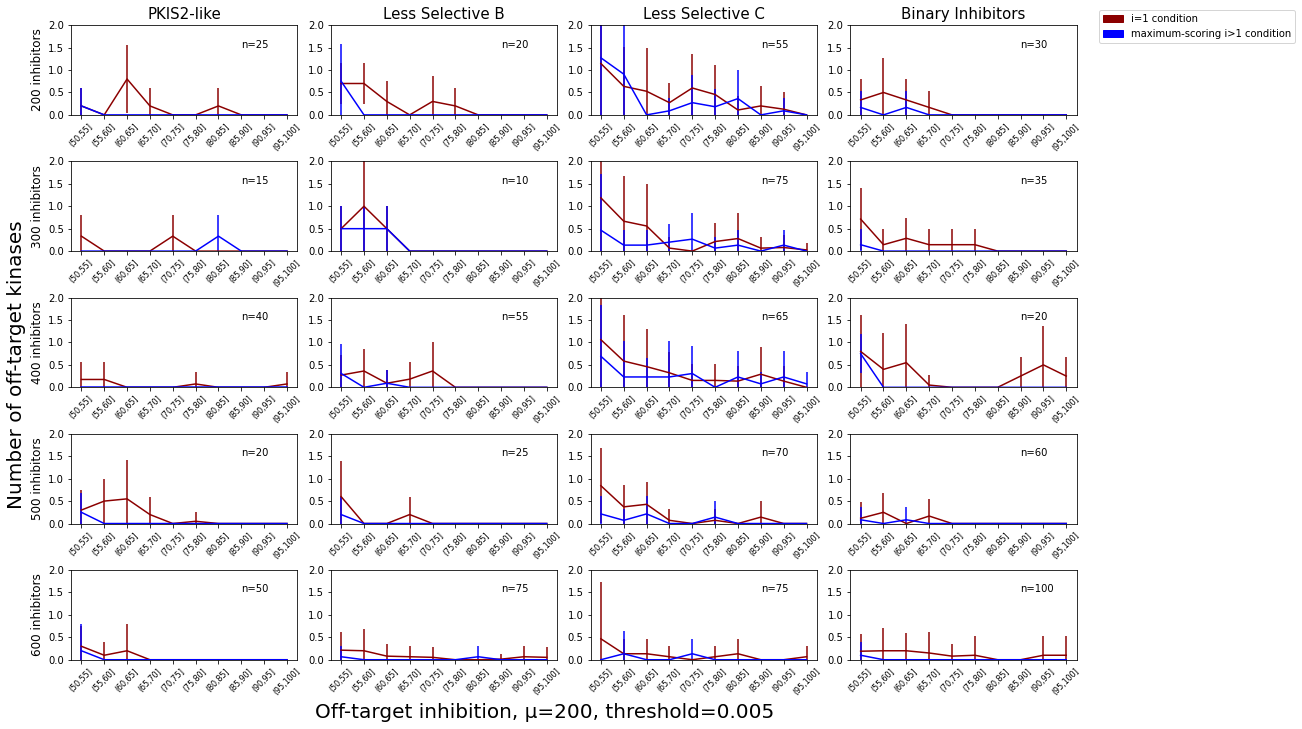

In [142]:
off_target_effects_200 = off_target_effects_200 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(15,10),constrained_layout=True)

fig.supxlabel('Off-target inhibition, μ=200, threshold=0.005', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.2, 1))

axes[0][0].set_title('PKIS2-like',fontsize=15)
axes[0][1].set_title('Less Selective B',fontsize=15)
axes[0][2].set_title('Less Selective C',fontsize=15)
axes[0][3].set_title('Binary Inhibitors',fontsize=15)

axes[0][0].set_ylabel('200 inhibitors',fontsize=12)
axes[1][0].set_ylabel('300 inhibitors',fontsize=12)
axes[2][0].set_ylabel('400 inhibitors',fontsize=12)
axes[3][0].set_ylabel('500 inhibitors',fontsize=12)
axes[4][0].set_ylabel('600 inhibitors',fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_200_binned = []
    
        for replicate in off_target_effects_200[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_200_binned.append(bins)
            
        max_200_binned = []
    
        for replicate in off_target_effects_200[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_200_binned.append(bins)

        
        avg_i1_200=list(np.average(i1_200_binned, axis=0))
        std_i1_200=list(np.std(i1_200_binned, axis=0))
        
        n=len(i1_200_binned)
    
        avg_max_200=list(np.average(max_200_binned, axis=0))
        std_max_200=list(np.std(max_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_200 = bin_max[10:]
        avg_i1_200 = avg_i1_200[10:]
        std_i1_200 = std_i1_200[10:]
        avg_max_200 = avg_max_200[10:]
        std_max_200 = std_max_200[10:]
    
        ylim200_a = max(avg_i1_200)
        ylim200_b = max(avg_max_200)
        ylim_200 = max([ylim200_a,ylim200_b])
    
        axes[row][col].errorbar(bin_max_200, avg_i1_200, yerr=std_i1_200,xerr=None, color='darkred')
        axes[row][col].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
        axes[row][col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[row][col].set_ylim([0,2])
        
        n=len(i1_200_binned)
        axes[row][col].text(7, 1.5, 'n='+str(n))
    
fig.savefig("121921_PKIS2_JSD_off-target-effects-u=200-threshold=0.005.pdf", bbox_inches='tight',dpi=500)

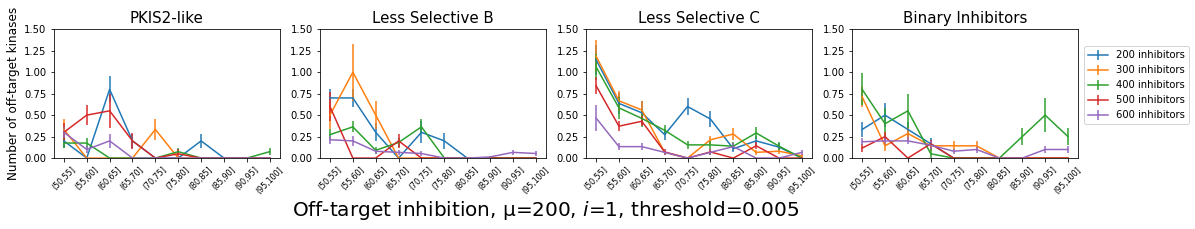

In [144]:
from scipy.stats import sem

#plot just the i=1 scores with SEM (not std) of the scores

off_target_effects_200 = off_target_effects_200 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(1, ncols, figsize=(15,3),constrained_layout=True)

axes[0].set_title('PKIS2-like',fontsize=15)
axes[1].set_title('Less Selective B',fontsize=15)
axes[2].set_title('Less Selective C',fontsize=15)
axes[3].set_title('Binary Inhibitors',fontsize=15)

fig.supxlabel('Off-target inhibition, μ=200, $\it{i}$=1, threshold=0.005', fontsize=20)
axes[0].set_ylabel('Number of off-target kinases', fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_200_binned = []
    
        for replicate in off_target_effects_200[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_200_binned.append(bins)
        
        avg_i1_200=list(np.average(i1_200_binned, axis=0))
        sem_i1_200=list(sem(i1_200_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_200 = bin_max[10:]
        avg_i1_200 = avg_i1_200[10:]
        sem_i1_200 = sem_i1_200[10:]
    
        ylim200_a = max(avg_i1_200)
        ylim200_b = max(avg_max_200)
        ylim_200 = max([ylim200_a,ylim200_b])
    
        axes[col].errorbar(bin_max_200, avg_i1_200, yerr=sem_i1_200,xerr=None)
        axes[col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[col].set_ylim([0,1.5])
        
fig.legend(labels=['200 inhibitors','300 inhibitors',
                   '400 inhibitors','500 inhibitors',
                   '600 inhibitors'],bbox_to_anchor=(1.1, 0.85))
    
fig.savefig("121921_PKIS2_JSD_700v200_best_i1_offtarget_profiles_u=200_threshold=0.005.pdf", bbox_inches='tight',dpi=500)

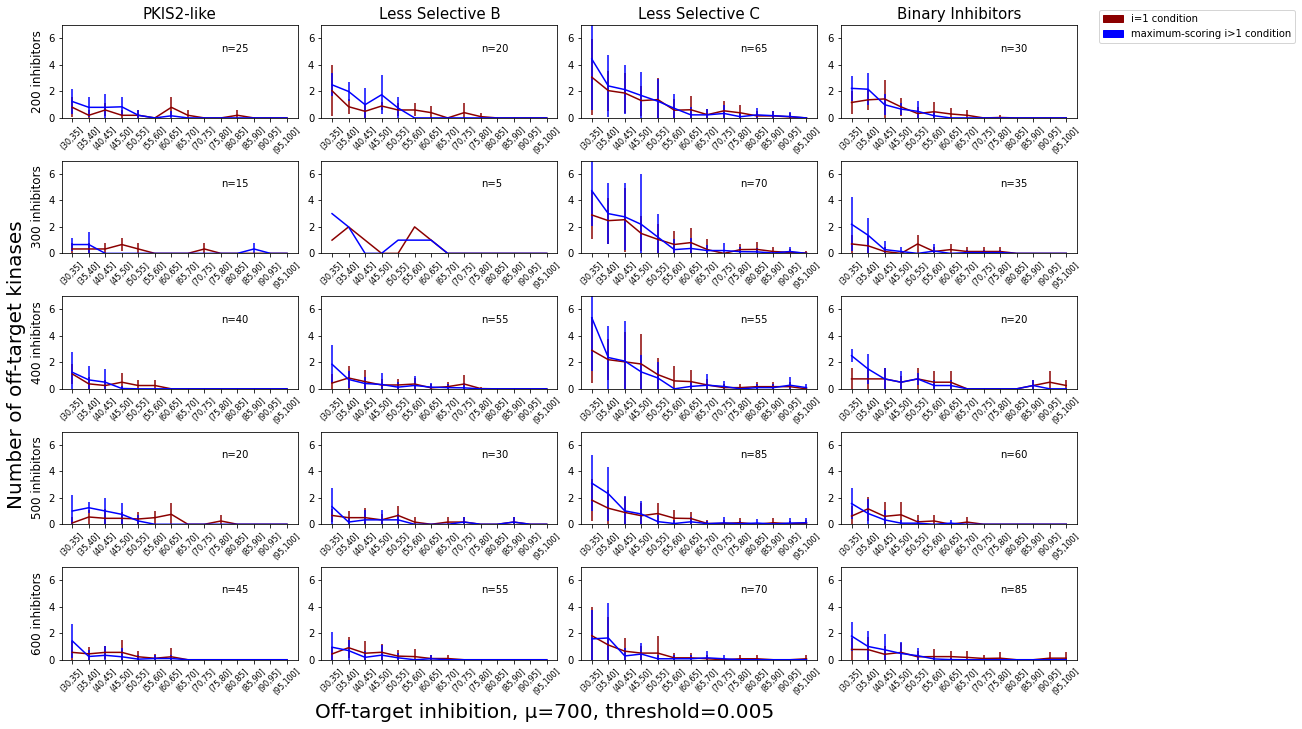

In [150]:
off_target_effects_700 = off_target_effects_700 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(15,10),constrained_layout=True)

fig.supxlabel('Off-target inhibition, μ=700, threshold=0.005', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.2, 1))

axes[0][0].set_title('PKIS2-like',fontsize=15)
axes[0][1].set_title('Less Selective B',fontsize=15)
axes[0][2].set_title('Less Selective C',fontsize=15)
axes[0][3].set_title('Binary Inhibitors',fontsize=15)

axes[0][0].set_ylabel('200 inhibitors',fontsize=12)
axes[1][0].set_ylabel('300 inhibitors',fontsize=12)
axes[2][0].set_ylabel('400 inhibitors',fontsize=12)
axes[3][0].set_ylabel('500 inhibitors',fontsize=12)
axes[4][0].set_ylabel('600 inhibitors',fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_700_binned = []
    
        for replicate in off_target_effects_700[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_700_binned.append(bins)
            
        max_700_binned = []
    
        for replicate in off_target_effects_700[row][col][1]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            max_700_binned.append(bins)

        
        avg_i1_700=list(np.average(i1_700_binned, axis=0))
        std_i1_700=list(np.std(i1_700_binned, axis=0))
    
        avg_max_700=list(np.average(max_700_binned, axis=0))
        std_max_700=list(np.std(max_700_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
        
        #print(avg_i1_700,std_i1_700)
    
        #only plot from 20 upwards
        bin_max_700 = bin_max[6:]
        avg_i1_700 = avg_i1_700[6:]
        std_i1_700 = std_i1_700[6:]
        avg_max_700 = avg_max_700[6:]
        std_max_700 = std_max_700[6:]
    
        ylim700_a = max(avg_i1_700)
        ylim700_b = max(avg_max_700)
        ylim_700 = max([ylim700_a,ylim700_b])
    
        axes[row][col].errorbar(bin_max_700, avg_i1_700, yerr=std_i1_700,xerr=None, color='darkred')
        axes[row][col].errorbar(bin_max_700, avg_max_700, yerr=std_max_700,xerr=None, color='blue')
        #axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
        axes[row][col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[row][col].set_ylim([0,7])
        
        n=len(i1_700_binned)
        axes[row][col].text(9, 5, 'n='+str(n))
        
fig.savefig("121921_PKIS2_JSD_off-target-effects-u=700-threshold=0.005.pdf", bbox_inches='tight',dpi=500)

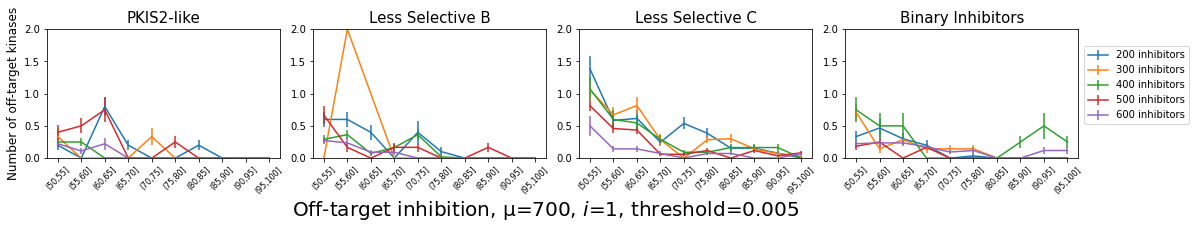

In [152]:
from scipy.stats import sem

#plot just the i=1 scores with SEM (not std) of the scores

off_target_effects_700 = off_target_effects_700 #a reminder of the variable name

nrows = 5
ncols = 4

fig, axes = plt.subplots(1, ncols, figsize=(15,3),constrained_layout=True)

axes[0].set_title('PKIS2-like',fontsize=15)
axes[1].set_title('Less Selective B',fontsize=15)
axes[2].set_title('Less Selective C',fontsize=15)
axes[3].set_title('Binary Inhibitors',fontsize=15)

fig.supxlabel('Off-target inhibition, μ=700, $\it{i}$=1, threshold=0.005', fontsize=20)
axes[0].set_ylabel('Number of off-target kinases', fontsize=12)

for row in range(0, nrows):
    
    for col in range(0, ncols):
        
        i1_700_binned = []
    
        for replicate in off_target_effects_700[row][col][0]:
            vals = (replicate[1:-1]).split(', ')
            vals = [float(x) for x in vals]
            bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
            for x in range(0, len(vals)): 
                temp = int(vals[x]/5)
                if temp < 20 and temp >= 0:
                    bins[temp] += 1.0
                elif temp >= 20:
                    bins[len(bins)-1] += 1.0
                else:
                    bins[0] += 1.0
            i1_700_binned.append(bins)
        
        avg_i1_700=list(np.average(i1_700_binned, axis=0))
        sem_i1_700=list(sem(i1_700_binned, axis=0))
    
        bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
        #only plot from 20 upwards
        bin_max_700 = bin_max[10:]
        avg_i1_700 = avg_i1_700[10:]
        sem_i1_700 = sem_i1_700[10:]
    
        axes[col].errorbar(bin_max_700, avg_i1_700, yerr=sem_i1_700,xerr=None)
        axes[col].tick_params(axis='x', labelsize=8, rotation=45)
        axes[col].set_ylim([0,2])
        
fig.legend(labels=['200 inhibitors','300 inhibitors',
                   '400 inhibitors','500 inhibitors',
                   '600 inhibitors'],bbox_to_anchor=(1.1, 0.85))
    
fig.savefig("121921_PKIS2_JSD_700v200_best_i1_offtarget_profiles_u=700_threshold=0.005.pdf", bbox_inches='tight',dpi=500)